# Welcome to the notebook of securePhoto.
## This python3 notebook helps to construct the project in homogenized interface

* No Need to configure anything
* Ready to test system
* Possibility to comment the code and add more example

NOTE :

_A command beginning with "!" enable shell command._



Importing all the necessary package.

In [1]:
!pip install pillow
!pip install numpy
!pip install matplotlib

Make sure that every package is installed in the notebook.

In [0]:
# To read picture
import PIL as pil
import matplotlib.image as img
# To create array
import numpy as np
# To create picture 
import matplotlib.pyplot as plt
# To display inside the notebook
from IPython.display import Image, display
# For the randomness
import random
import time

In [0]:
BEGINNING_MESSAGE = '!@#QWEASDZXC'

Creating the image to test the principle

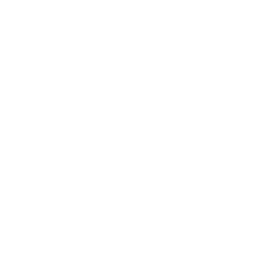

'white (256x256)'

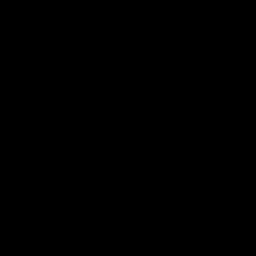

'black (256x256)'

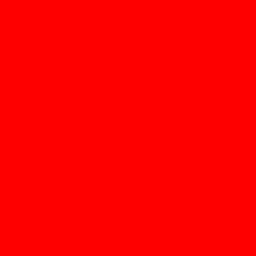

'red (256x256)'

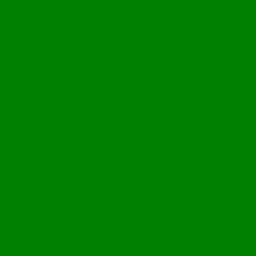

'green (256x256)'

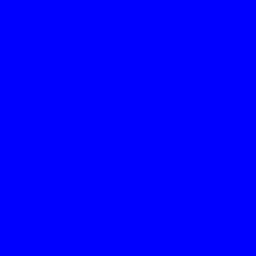

'blue (256x256)'

In [4]:
# Create the test picture
# Content inside /content/ repository
color_palette = ['white', 'black', 'red', 'green', 'blue']
images = {}
for color in color_palette:
  images[color] = pil.Image.new('RGB', (256, 256), color=color)
  images[color].save(color+'256.png')

# Display the test picture
for image in images:
  display(Image("%s256.png"%(image)))
  display("%s (256x256)"%(image))

Checking the pixel of the images.

In [5]:
for color in color_palette:
  print(color)
  pixels = pil.Image.open(color+'256.png').load()

  for i in range(1):
    print(pixels[0, i])

white
(255, 255, 255)
black
(0, 0, 0)
red
(255, 0, 0)
green
(0, 128, 0)
blue
(0, 0, 255)


Checking how to create a picture by creating a true green.

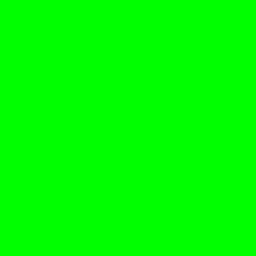

'true_green (256x256)'

In [6]:
data = np.zeros((256, 256, 3), dtype=np.uint8)
for i in range(256):
  for j in range(256):
    data[i, j] = [0, 255, 0]


image = pil.Image.fromarray(data)
image.save('true_green256.png')

display(Image('true_green256.png'))
display("true_green (256x256)")

Take the data from a picture and transfer it into an array.

In [0]:
def transfer2array(name_picture):
  pixels = pil.Image.open(name_picture)
  size_x, size_y= pixels.size
  pixels = pixels.load()
  
  data = np.zeros((size_x, size_y, 3), dtype=np.uint8)
  for i in range(size_x):
    for j in range(size_y):
      data[i, j] = pixels[i, j]
  return data

Display the ascii value of string/text.

In [8]:
def echo_value_text(text):
  #Display the value
  value = []
  text_array = []
  for i in range(len(text)):
    value.append(ord(text[i]))
    text_array.append(text[i])
  print(text_array)
  print(value)
  return
echo_value_text('Hello world!')

['H', 'e', 'l', 'l', 'o', ' ', 'w', 'o', 'r', 'l', 'd', '!']
[72, 101, 108, 108, 111, 32, 119, 111, 114, 108, 100, 33]


Create image from array

In [0]:
def create_image(array, name_picture):
  image = pil.Image.fromarray(array)
  image.save(name_picture+'.png')
  display(Image(name_picture+'.png'))
  return

Try to modify the value by adding the blue with the red.

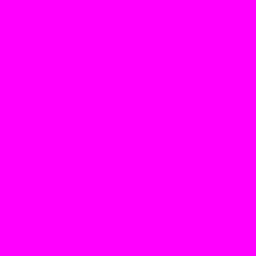

In [10]:
def add_template(picture_name, template_name, result_name='result'):
  picture = transfer2array(picture_name)
  template = transfer2array(template_name)

  new = np.add(picture, template)
  create_image(new, result_name)
add_template('blue256.png', 'red256.png', 'pink256')

Creating a random template

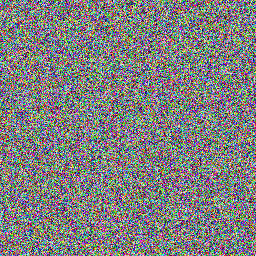

In [11]:
def random_template(size_x, size_y):
  """
  size_x : size for the x axis
  size_y : size for the y axis
  Create a template and save it
  :return None: 
  """
  data = np.zeros((size_x, size_y, 3), dtype=np.uint8)
  for i in range(size_x):
    for j in range(size_y):
      # create a picture like array
      data[i, j] = np.multiply(np.random.rand(1, 3), 255)
      
  image = pil.Image.fromarray(data)
  image.save('random_template.png')
  display(Image('random_template.png'))
  return
random_template(256, 256)

Create a template from a text

In [12]:
def value2pixel(value):
  pixelRG=value//3
  pixelB=pixelRG+value%3
  return [pixelRG, pixelRG, pixelB]
print(value2pixel(62))

[20, 20, 22]


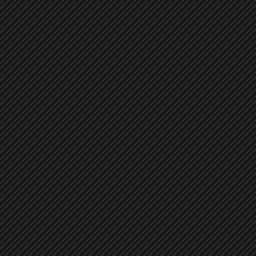

'Hello World! - template'

In [13]:
def text_template(text, size_x, size_y):
  data = np.zeros((size_x, size_y, 3), dtype=np.uint8)
  for i in range(size_x):
    for j in range(size_y):
      data[i, j] = value2pixel(ord(text[(i+j)%len(text)]))

  image = pil.Image.fromarray(data)
  image.save('text_template.png')
  display(Image('text_template.png'))
  return
text_template('Hello World!', 256, 256)
display("Hello World! - template")

Create a divsion of the value to minimize the modification.

In [14]:
def pixel2value(pixel):
  return pixel[0]+pixel[1]+pixel[2]
print(pixel2value(value2pixel(62)))

62


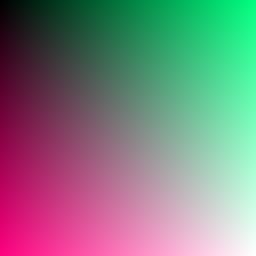

In [15]:
# create a fade
size_x = 256
size_y = 256
data = np.zeros((size_x, size_y, 3), dtype=np.uint8)
for i in range(size_x):
  for j in range(size_y):
    # create a picture like array
    data[i, j] = [(i), (j), (i+j)//2]

image = pil.Image.fromarray(data)
image.save('fade256.png')
display(Image('fade256.png'))

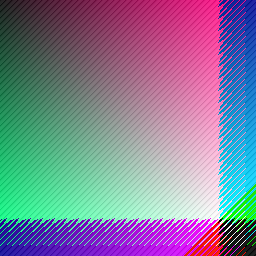

"We can see that there's a clear overflow."

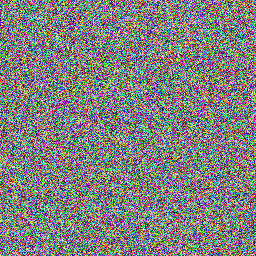

'Above: modified, below: original'

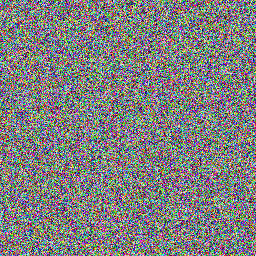

"We can see that with high noise picture the easy-add method doesn't affect the original picture"

In [16]:
# Add text_template to fade without taking in consideration the overflow
add_template('fade256.png', 'text_template.png', 'fade_text')
display('We can see that there\'s a clear overflow.')
# Check the result between random template and text_template
add_template('random_template.png', 'text_template.png', 'random_text')
display('Above: modified, below: original')
display(Image('random_template.png'))
display('We can see that with high noise picture the easy-add method doesn\'t \
affect the original picture')

##Create __low__ modification template

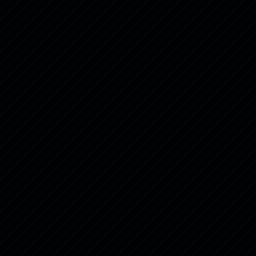

In [17]:
# Create low modification template
def lomod_template(content, size):
  # Create the array for the picture
  data = np.zeros((len(content), 1, 3), dtype=np.uint8)
  
  for i in range(len(content)):
    val=ord(content[i])
    #print(val)
    data[i]=[val//100, (val%100)//10, val%10]
    #print(data[i])  
  
  picture = np.zeros((size[0], size[1], 3), dtype=np.uint8)
  for i in range(size[0]):
    for j in range(size[1]):
      picture[i,j]=data[(i+j)%len(data)]
  
  image = pil.Image.fromarray(picture)
  image.save('lomod_template.png')
  display(Image('lomod_template.png'))
  return
    
lomod_template('Hello my name is ricardo montoya', [256, 256]) 


##Create non-overflow add method

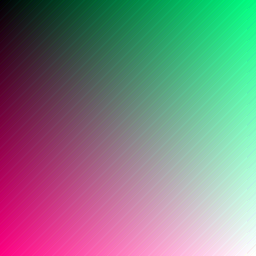

'low modification template with no overhead addition'

In [18]:
# Create non-overflow add method
def add_no_overhead(picture_name, template_name, result_name):
  # Transfer the picture into an array
  picture = transfer2array(picture_name)
  template = transfer2array(template_name)
  size_x, size_y = picture.shape[0], picture.shape[1]
  data = np.zeros((picture.shape), dtype=np.uint8)
  uint8max=2**8
  for i in range(size_x):
    for j in range(size_y):
      for k in range(3):
        if float(picture[j,i,k])+float(template[j,i,k]) >= uint8max:
          data[i,j,k]=picture[j,i,k]-template[j,i,k]
        else:
          data[i,j,k]=picture[j,i,k]+template[j,i,k]
          
  image = pil.Image.fromarray(data)
  image.save(result_name+'.png')
  display(Image(result_name+'.png'))
  return

# Add text_template to fade without taking in consideration the overflow
add_no_overhead('fade256.png', 'lomod_template.png', 'fade_text_nooverhead')
display('low modification template with no overhead addition')

##Even with low modification and no overhead addition
It's possible to see the template because of the  repetition in the template.

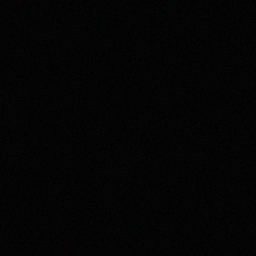

"Even if it is not visible there's a randomness in the picture."

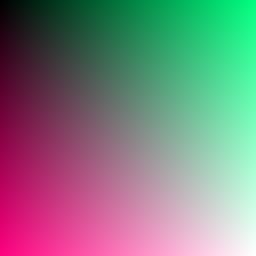

'original'

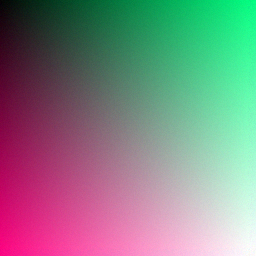

'modified'

In [19]:
def lomod_random_template(size_x, size_y):
  """
  size_x : size for the x axis
  size_y : size for the y axis
  Create a template and save it
  :return None: 
  """
  data = np.zeros((size_x, size_y, 3), dtype=np.uint8)
  for i in range(size_x):
    for j in range(size_y):
      # create a picture like array
      data[i, j] = np.multiply(np.random.rand(1, 3), 9)
      
  image = pil.Image.fromarray(data)
  image.save('lomod_random_template.png')
  display(Image('lomod_random_template.png'))
  return
lomod_random_template(256, 256)
display('Even if it is not visible there\'s a randomness in the picture.')
display(Image('fade256.png'))
display('original')
add_no_overhead('fade256.png', 'lomod_random_template.png', 'photo_lomod_random_nooverhead')
display('modified')

The test with the randomness prove that random noise is hard to identify with the human eyes.


In [20]:
import random
random.seed(1)
for i in range(20):
  print(random.randrange(0,256,1), end=',')
print('\b ')
random.seed(1435677)
for i in range(20):
  print(random.randrange(0,10,1), end=',')
print('\b ')
random.seed(1)
for i in range(20):
  print(random.randrange(0,256,1), end=',')
print('\b ')

68,32,130,60,253,230,241,194,107,48,249,14,199,221,1,228,136,117,52,162, 
2,0,3,8,4,2,9,7,2,5,9,9,6,9,9,4,6,2,0,3, 
68,32,130,60,253,230,241,194,107,48,249,14,199,221,1,228,136,117,52,162, 


With that method I can create a way to add randomness and constancy.

In [0]:
## Create a template that take the randomness in acount.
#from google.colab import files
#files.download('fade256.png')

In [0]:
#This will insert plain text in photo 
!echo 'key:1234567890' >> ./fade256.png

Create Random pattern template...

In [0]:
def progressbar(progress, qty):
  progressbar_width=40
  
  if progress > qty:
    progress = qty
    
  i = (progress+1)*progressbar_width//qty
  progress = '='*i
  remain = '-'*(progressbar_width-i)
  info = '| {}/{}'.format(i*qty//progressbar_width,qty)
  
  print('\r', end='', flush=True)
  print('|', end='', flush=True)
  if i < (progressbar_width*10)//100:
    print('\033[35m', end='', flush=True)
  elif i < (progressbar_width*50)//100:
    print('\033[31m', end='', flush=True)
  elif i < (progressbar_width*90)//100:
    print('\033[33m', end='', flush=True)
  else:
    print('\033[32m', end='', flush=True)
  print(progress+'\033[0m'+remain+info, end='', flush=True)
  
  return

In [0]:
def val2pixel(val):
  """
  Transform a value into a pixel
  :return: a pixel
  """
  return [val//100, (val%100)//10, val%10]

In [0]:
# Create low modification template
def full_lomod_random_template(content, size):
  """
  Create a picture with a message inside encoded
  :return: key for the random seed
  """
  key = time.monotonic()*31415926//1
  random.seed(key)
  # Create the array for the picture
  content = BEGINNING_MESSAGE + content
  data = np.zeros((len(content), 1, 3), dtype=np.uint8)
  
  for i in range(len(content)):
    val=ord(content[i])
    #print(val)
    data[i]=[val//100, (val%100)//10, val%10]  
  
  picture = np.zeros((size[0], size[1], 3), dtype=np.uint8)
  # A grid to valid the insertion of data
  valid_grid = np.zeros((size[0], size[1], 1), dtype=np.uint8)
  
  finish_result = size[0]*size[1]
  message_i=0
  while np.sum(valid_grid) != finish_result:
    i = random.randrange(0,256,1)
    j = random.randrange(0,256,1)
    if valid_grid[i,j] == 0:
      if message_i%1000 == 0:
        progressbar(message_i,finish_result)
      valid_grid[i,j] = 1 # Make the space checked
      picture[i,j] = data[(message_i)%len(content)] # transfer the data
      message_i += 1 # increment the data transfer counter
  
  image = pil.Image.fromarray(picture)
  image.save('lomod_random_template.png')
  display(Image('lomod_random_template.png'))
  return key

In [0]:
# Create low modification template
def lomod_random_template_decoder(image_coded, size, key):
  """
  Decode a picture with a message inside encoded
  :return: key for the random seed
  """
  random.seed(key)
  # Create the array for the picture
  data = ''
  picture = transfer2array(image_coded)
  # A grid to valid the insertion of data
  valid_grid = np.zeros((size[0], size[1], 1), dtype=np.uint8)
  
  finish_result = size[0]*size[1]
  message_i=0
  end_var = 0
  while np.sum(valid_grid) != finish_result and end_var < 2 and message_i < 100:
    j = random.randrange(0,256,1)
    i = random.randrange(0,256,1)
    if valid_grid[i,j] == 0:
      valid_grid[i,j] = 1 # Make the space checked
      data += chr(100*picture[i,j][0] + 10*picture[i,j][1] + picture[i,j][2])
      if len(data) >= 1 :
        if data[message_i] == BEGINNING_MESSAGE[1] and data[message_i-1] == BEGINNING_MESSAGE[0]:
          end_var += 1
      message_i += 1 # increment the data transfer counter
      if message_i == len(BEGINNING_MESSAGE) and data != BEGINNING_MESSAGE:
        return 'THE KEY DOESN\'T MATCH' 
  
  return data.replace(BEGINNING_MESSAGE, '')[:-2]
    

--- Encrypt ---
!@#QWEASDZXCHello my name is ricardo montoya. You kill my father. Prepare to die!
|=======================================-| 63897/65536

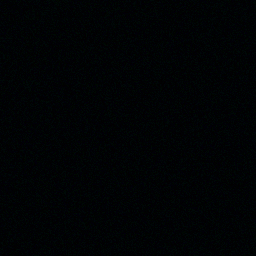

--- Decrypt ---
Text to encode : Hello my name is ricardo montoya. You kill my father. Prepare to die!
key : 140414328386.0
Decoded text : Hello my name is ricardo montoya. You kill my father. Prepare to die!


In [77]:
# test the process
text ='Hello my name is ricardo montoya. You kill my father. Prepare to die!'
print('--- Encrypt ---')
key = full_lomod_random_template(text, [256, 256]) 
print('--- Decrypt ---')
retrieve = lomod_random_template_decoder('lomod_random_template.png', [256, 256], key)

print('Text to encode :',text)
print('key :',key)
print('Decoded text :',retrieve)

Test to see when the key is not the right key

In [28]:
retrieve = lomod_random_template_decoder('lomod_random_template.png', [256, 256], 20)
print(retrieve)

THE KEY DOESN'T MATCH


# Idea of thing to do
1. Double-write encoded template
2. Rapid validation text of the key
3. Single-write encoded template

In [0]:
# Create low modification template
def single_lomod_random_template(content, size):
  """
  Create a picture with a message inside encoded
  :return: key for the random seed
  """
  key = time.monotonic()*31415926//1
  random.seed(key)
  
  content = BEGINNING_MESSAGE+content+BEGINNING_MESSAGE
  # Create the array for the picture
  data = np.zeros((len(content), 1, 3), dtype=np.uint8)
  
  for i in range(len(content)):
    val=ord(content[i])
    #print(val)
    data[i]=[val//100, (val%100)//10, val%10]  
  
  picture = np.zeros((size[0], size[1], 3), dtype=np.uint8)
  # A grid to valid the insertion of data
  valid_grid = np.zeros((size[0], size[1], 1), dtype=np.uint8)
  
  finish_result = size[0]*size[1]
  message_i=0
  while np.sum(valid_grid) <= len(BEGINNING_MESSAGE+content+BEGINNING_MESSAGE):
    i = random.randrange(0,256,1)
    j = random.randrange(0,256,1)
    if valid_grid[i,j] == 0:
      if message_i%1000 == 0:
        progressbar(message_i,finish_result)
      valid_grid[i,j] = 1 # Make the space checked
      if message_i < len(BEGINNING_MESSAGE):
        picture[i,j] = val2pixel(ord(BEGINNING_MESSAGE[message_i])) # transfer the data
      else:
        picture[i,j] = data[(message_i)%len(content)] # transfer the data
      message_i += 1 # increment the data transfer counter
  for i in range(size[0]):
    for j in range(size[1]):
      if valid_grid[i,j] == 0:
        valid_grid[i,j] = 1
        picture[i,j]= val2pixel(random.randrange(0,256,1))
        
  image = pil.Image.fromarray(picture)
  image.save('lomod_random_template.png')
  display(Image('lomod_random_template.png'))
  return key

--- Encrypt ---
|----------------------------------------| 0/65536

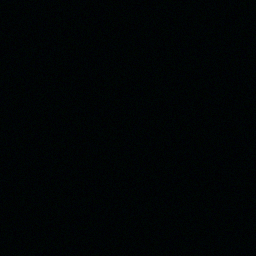

--- Decrypt ---
Text to encode : Hello my name is ricardo montoya. You kill my father. Prepare to die!
key : 144549971633.0
Decoded text : Hello my name is ricardo montoya. You kill my father. Prepare to die!Hello my nameQïðZ


In [80]:
# test the process
text ='Hello my name is ricardo montoya. You kill my father. Prepare to die!'
print('--- Encrypt ---')
key = single_lomod_random_template(text, [256, 256]) 
print('--- Decrypt ---')
retrieve = lomod_random_template_decoder('lomod_random_template.png', [256, 256], key)

print('Text to encode :',text)
print('key :',key)
print('Decoded text :',retrieve)

In [0]:
# Create low modification template
def double_lomod_random_template(content, size):
  """
  Create a picture with a message inside encoded
  :return: key for the random seed
  """
  key = time.monotonic()*31415926//1
  random.seed(key)
  # Create the array for the picture
  data = np.zeros((len(content), 1, 3), dtype=np.uint8)
  
  for i in range(len(content)):
    val=ord(content[i])
    #print(val)
    data[i]=[val//100, (val%100)//10, val%10]  
  
  picture = np.zeros((size[0], size[1], 3), dtype=np.uint8)
  # A grid to valid the insertion of data
  valid_grid = np.zeros((size[0], size[1], 1), dtype=np.uint8)
  
  finish_result = size[0]*size[1]
  message_i=0
  while np.sum(valid_grid) <= len((BEGINNING_MESSAGE+content)*2+BEGINNING_MESSAGE):
    i = random.randrange(0,256,1)
    j = random.randrange(0,256,1)
    if valid_grid[i,j] == 0:
      if message_i%1000 == 0:
        progressbar(message_i,finish_result)
      valid_grid[i,j] = 1 # Make the space checked
      if message_i < len(BEGINNING_MESSAGE):
        picture[i,j] = val2pixel(ord(BEGINNING_MESSAGE[message_i])) # transfer the data
      else:
        picture[i,j] = data[(message_i-len(BEGINNING_MESSAGE))%len(content)] # transfer the data
      message_i += 1 # increment the data transfer counter
  for i in range(size[0]):
    for j in range(size[1]):
      if valid_grid[i,j] == 0:
        valid_grid[i,j] = 1
        picture[i,j]= val2pixel(random.randrange(0,256,1))
        
  image = pil.Image.fromarray(picture)
  image.save('lomod_random_template.png')
  display(Image('lomod_random_template.png'))
  return key

--- Encrypt ---
|----------------------------------------| 0/65536

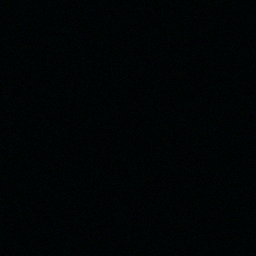

--- Decrypt ---
Text to encode : Hello my name is ricardo montoya. You kill my father. Prepare to die!
key : 31366771034.0
Decoded text : Hello my name is ricardo montoya. You kill my father. Prepare to die!Hello my name is ricardo montoya. You kill my father. Prepare to die!Hello my name is ricardo $U- I®0´àlàz0o¢ö


In [32]:
# test the process
text ='Hello my name is ricardo montoya. You kill my father. Prepare to die!'
print('--- Encrypt ---')
key = double_lomod_random_template(text, [256, 256]) 
print('--- Decrypt ---')
retrieve = lomod_random_template_decoder('lomod_random_template.png', [256, 256], key)

print('Text to encode :',text)
print('key :',key)
print('Decoded text :',retrieve)